In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape)
print(x_test.shape)
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
inputs = tf.keras.Input((28,28,1)) 
conv_1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', 
                                kernel_regularizer=tf.keras.regularizers.L1L2(0.01, 0.01))(inputs)
bn_1 = tf.keras.layers.BatchNormalization()(conv_1)
act_1 = tf.keras.layers.Activation("relu")(bn_1)
pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid',)(act_1)
do_1 = tf.keras.layers.Dropout(0.6)(pool_1)

conv_2 = tf.keras.layers.Conv2D(16, (3, 3), padding='same', kernel_regularizer="L1L2")(do_1)
bn_2 = tf.keras.layers.BatchNormalization()(conv_2)
act_2 = tf.keras.layers.Activation("relu")(bn_2)
pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(act_2)
do_2 = tf.keras.layers.Dropout(0.6)(pool_2)

conv_3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer="L1L2")(do_2)
bn_3 = tf.keras.layers.BatchNormalization()(conv_3)
act_3 = tf.keras.layers.Activation("relu")(bn_3)
pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(act_3)
do_3 = tf.keras.layers.Dropout(0.6)(pool_3)

flatten = tf.keras.layers.Flatten()(do_3)
dense_1 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer="L1L2")(flatten)
dense_2 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer="L1L2")(dense_1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dense_2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, steps_per_epoch=200,
                    verbose=2,validation_steps=50,validation_split=0.2)

Epoch 1/50
200/200 - 14s - loss: 1.5024 - sparse_categorical_accuracy: 0.5514 - val_loss: 2.8568 - val_sparse_categorical_accuracy: 0.1025 - 14s/epoch - 69ms/step
Epoch 2/50
200/200 - 1s - loss: 0.7801 - sparse_categorical_accuracy: 0.7684 - val_loss: 2.4629 - val_sparse_categorical_accuracy: 0.2294 - 990ms/epoch - 5ms/step
Epoch 3/50
200/200 - 1s - loss: 0.5178 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.9451 - val_sparse_categorical_accuracy: 0.7431 - 1s/epoch - 5ms/step
Epoch 4/50
200/200 - 1s - loss: 0.4123 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.4464 - val_sparse_categorical_accuracy: 0.8806 - 987ms/epoch - 5ms/step
Epoch 5/50
200/200 - 1s - loss: 0.3340 - sparse_categorical_accuracy: 0.9069 - val_loss: 0.2339 - val_sparse_categorical_accuracy: 0.9531 - 982ms/epoch - 5ms/step
Epoch 6/50
200/200 - 1s - loss: 0.3190 - sparse_categorical_accuracy: 0.9102 - val_loss: 0.2177 - val_sparse_categorical_accuracy: 0.9488 - 989ms/epoch - 5ms/step
Epoch 7/50
200/200 - 1s -

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9891


[0.04267571121454239, 0.9890999794006348]

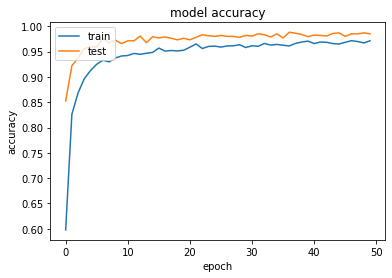

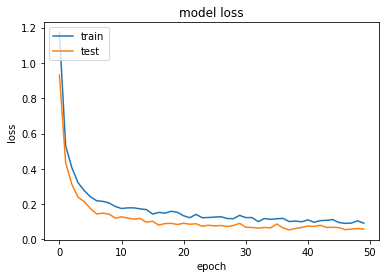

In [ ]:
# plot accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Data Augmentation

In [ ]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


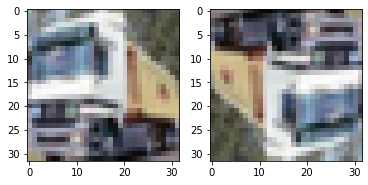

In [ ]:
augmentation = tf.keras.Sequential()
augmentation.add(tf.keras.layers.RandomFlip())
aug_img = augmentation(x_train[1])

plt.subplot(1, 2, 1)
plt.imshow(x_train[1])
plt.subplot(1, 2, 2)
plt.imshow(aug_img)

## Augmentation during training the model

In [ ]:
model = tf.keras.Sequential()
model.add(augmentation)
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same'))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid',))

model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100


1563/1563 [==============================] - 26s 14ms/step - loss: 1.3740 - sparse_categorical_accuracy: 0.5026
Epoch 2/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0064 - sparse_categorical_accuracy: 0.6444
Epoch 3/100
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8296 - sparse_categorical_accuracy: 0.7043
Epoch 4/100
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6758 - sparse_categorical_accuracy: 0.7607
Epoch 5/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5313 - sparse_categorical_accuracy: 0.8105
Epoch 6/100
 667/1563 [===========>..................] - ETA: 11s - loss: 0.3654 - sparse_categorical_accuracy: 0.8729

KeyboardInterrupt: ignored

## Augmentation before training the model

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_ds = train_ds.batch(32).map(lambda x, y: (augmentation(x), y),
                                  num_parallel_calls=tf.data.AUTOTUNE)

test_ds = test_ds.batch(32)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same'))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid',))

model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(train_ds,validation_data=test_ds,epochs=100)

NameError: ignored

# Datasets

In [ ]:
ds = tf.data.Dataset.list_files("/path/to/files/*.csv")

In [ ]:
data_dir = "./data/images/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory=data_dir,
  label_mode="int",
  validation_split=0.2,
  subset="training",
  image_size=(28, 28),
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  directory=data_dir,
  label_mode="int",
  validation_split=0.2,
  subset="validation",
  image_size=(28, 28),
  batch_size=32)

# TPU

In [ ]:
import os
os.environ["COLAB_TPU_ADDR"]

'10.113.119.2:8470'

In [ ]:
if 'COLAB_TPU_ADDR' in os.environ:
  TPU_WORKER = 'grpc://{0}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TPU_WORKER=''

print(TPU_WORKER)

grpc://10.113.119.2:8470


In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TPU_WORKER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print(tf.config.list_logical_devices('TPU'))

[LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
with strategy.scope():
  inputs = tf.keras.Input((28,28,1)) 
  conv_1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same')(inputs)
  act_1 = tf.keras.layers.Activation("relu")(conv_1)
  pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid',)(act_1)
  do_1 = tf.keras.layers.Dropout(0.6)(pool_1)

  conv_2 = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(do_1)
  act_2 = tf.keras.layers.Activation("relu")(conv_2)
  pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(act_2)
  do_2 = tf.keras.layers.Dropout(0.6)(pool_2)

  conv_3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(do_2)
  act_3 = tf.keras.layers.Activation("relu")(conv_3)
  pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(act_3)
  do_3 = tf.keras.layers.Dropout(0.6)(pool_3)

  flatten = tf.keras.layers.Flatten()(do_3)
  dense_1 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer="L1L2")(flatten)
  dense_2 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer="L1L2")(dense_1)
  outputs = tf.keras.layers.Dense(10, activation='softmax')(dense_2)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
  )

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, steps_per_epoch=200,
                    verbose=2,validation_steps=50,validation_split=0.2)

Epoch 1/50
200/200 - 7s - loss: 1.1371 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7691 - val_sparse_categorical_accuracy: 0.8425 - 7s/epoch - 36ms/step
Epoch 2/50
200/200 - 2s - loss: 0.5166 - sparse_categorical_accuracy: 0.8319 - val_loss: 0.4118 - val_sparse_categorical_accuracy: 0.9150 - 2s/epoch - 11ms/step
Epoch 3/50
200/200 - 2s - loss: 0.3297 - sparse_categorical_accuracy: 0.8880 - val_loss: 0.2873 - val_sparse_categorical_accuracy: 0.9450 - 2s/epoch - 10ms/step
Epoch 4/50
200/200 - 2s - loss: 0.3067 - sparse_categorical_accuracy: 0.9030 - val_loss: 0.2065 - val_sparse_categorical_accuracy: 0.9625 - 2s/epoch - 10ms/step
Epoch 5/50
200/200 - 2s - loss: 0.2617 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.1786 - val_sparse_categorical_accuracy: 0.9638 - 2s/epoch - 11ms/step
Epoch 6/50
200/200 - 2s - loss: 0.2327 - sparse_categorical_accuracy: 0.9247 - val_loss: 0.1804 - val_sparse_categorical_accuracy: 0.9644 - 2s/epoch - 12ms/step
Epoch 7/50
200/200 - 3s - loss: 0.

# Pre-trained architectures

In [2]:
vgg16_model = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    input_shape=(224, 224, 3),
    classes=1000,
    classifier_activation='softmax'
)

553467096/553467096 [==============================] - 4s 0us/step


In [3]:
vgg19_model = tf.keras.applications.vgg19.VGG19(
    include_top=True,
    input_shape=(224, 224, 3),
    classes=1000,
    classifier_activation='softmax'
)

574710816/574710816 [==============================] - 5s 0us/step


In [4]:
resnet_model = tf.keras.applications.resnet.ResNet101(
    include_top=True,
    input_shape=(224, 224, 3),
    classes=1000
)

179648224/179648224 [==============================] - 1s 0us/step


In [6]:
inception_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    input_shape=(299, 299, 3),
    classes=1000,
    classifier_activation='softmax'
)

96112376/96112376 [==============================] - 1s 0us/step
